<h1>Scaling Exercises<h1/>

<h2>Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.<h2/>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import env
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
from wrangle import wrangle_zillow
df = wrangle_zillow()
df.head() 

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
2,0,0.0,73026.0,1434941.0,1959,20800.37,6037.0
3,0,0.0,5068.0,1174475.0,1948,14557.57,6037.0
4,0,0.0,1776.0,440101.0,1947,5725.17,6037.0
5,0,0.0,2400.0,287634.0,1943,3661.28,6037.0
7,0,0.0,3611.0,698984.0,1946,7857.84,6037.0


<h2>Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .<h2/>


In [3]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625073 entries, 515265 to 1042963
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Bedroom_Count      1625073 non-null  int64  
 1   Bathroom_Count     1625073 non-null  float64
 2   Finished_sqft      1625073 non-null  float64
 3   Tax_value_dollars  1625073 non-null  float64
 4   Year_built         1625073 non-null  int64  
 5   Tax_amount         1625073 non-null  float64
 6   fips               1625073 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 99.2 MB


In [5]:
train.shape , validate.shape, test.shape

((1625073, 7), (696461, 7), (580384, 7))

In [6]:
import sklearn
#Create the object
scaler = sklearn.preprocessing.MinMaxScaler()

#Fit the object
scaler.fit(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Use the object
scaled_columns = scaler.transform(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Add the newly scaled columns (with the 'Scaled' names) to train
train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaled_columns

train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_value_dollars_Scaled,Tax_amount_Scaled,Year_built_Scaled
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0,0.12,0.06250,0.001456,0.001284,0.001242,0.714953
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0,0.20,0.09375,0.002545,0.002603,0.002483,0.808411
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0,0.04,0.03125,0.001154,0.001438,0.001553,0.948598
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0,0.08,0.06250,0.001274,0.001358,0.001371,0.934579
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0,0.16,0.06250,0.001789,0.001231,0.001442,0.691589


In [7]:
#Make new scaled columns with the newly scaled columns (with the 'Scaled' names) to validate and test

validate[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaler.transform(validate[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
test[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled','Year_built_Scaled']] = scaler.transform(test[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

In [8]:
validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696461 entries, 1073859 to 623268
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Bedroom_Count             696461 non-null  int64  
 1   Bathroom_Count            696461 non-null  float64
 2   Finished_sqft             696461 non-null  float64
 3   Tax_value_dollars         696461 non-null  float64
 4   Year_built                696461 non-null  int64  
 5   Tax_amount                696461 non-null  float64
 6   fips                      696461 non-null  float64
 7   Bedroom_Count_Scaled      696461 non-null  float64
 8   Bathroom_Count_Scaled     696461 non-null  float64
 9   Finished_sqft_Scaled      696461 non-null  float64
 10  Tax_value_dollars_Scaled  696461 non-null  float64
 11  Tax_amount_Scaled         696461 non-null  float64
 12  Year_built_Scaled         696461 non-null  float64
dtypes: float64(11), int64(2)
memory usage:

(None, None)

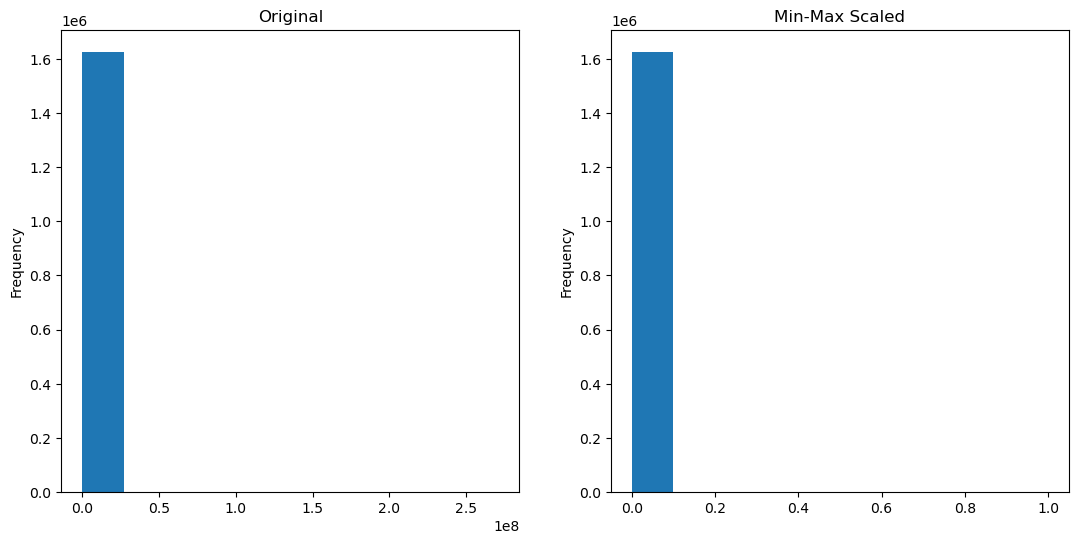

In [9]:
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.Tax_value_dollars.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.Tax_value_dollars_Scaled.plot.hist(title='Min-Max Scaled');

<h2>Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?<h2/>


In [10]:
inverse_scaled_columns = scaler.inverse_transform(train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']])
train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = inverse_scaled_columns
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_value_dollars_Scaled,Tax_amount_Scaled,Year_built_Scaled
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0,3.0,2.0,1388.0,347987.0,4073.83,1955.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0,5.0,3.0,2425.0,705314.0,8140.72,1975.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0,1.0,1.0,1100.0,389612.0,5095.62,2005.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0,2.0,2.0,1215.0,367965.0,4497.36,2002.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0,4.0,2.0,1705.0,333600.0,4731.08,1950.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625073 entries, 515265 to 1042963
Data columns (total 13 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Bedroom_Count             1625073 non-null  int64  
 1   Bathroom_Count            1625073 non-null  float64
 2   Finished_sqft             1625073 non-null  float64
 3   Tax_value_dollars         1625073 non-null  float64
 4   Year_built                1625073 non-null  int64  
 5   Tax_amount                1625073 non-null  float64
 6   fips                      1625073 non-null  float64
 7   Bedroom_Count_Scaled      1625073 non-null  float64
 8   Bathroom_Count_Scaled     1625073 non-null  float64
 9   Finished_sqft_Scaled      1625073 non-null  float64
 10  Tax_value_dollars_Scaled  1625073 non-null  float64
 11  Tax_amount_Scaled         1625073 non-null  float64
 12  Year_built_Scaled         1625073 non-null  float64
dtypes: float64(11), int64(

<h3>## The resulting dataset is the exact same as the original data, although year_built now is shown as a decimal '.0'<h3/>

<h2>Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.<h2/>


In [12]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0


In [13]:
from sklearn.preprocessing import QuantileTransformer
#Create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

#Fit the object
scaler.fit(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Use the object
scaled_columns = scaler.transform(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Add the newly scaled columns (with the 'Scaled' names) to train
train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaled_columns

train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_value_dollars_Scaled,Tax_amount_Scaled,Year_built_Scaled
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0,-0.114415,-0.229064,-0.333524,0.108435,-0.012439,-0.354822
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0,1.545927,0.832006,0.921984,1.092698,1.027969,0.422483
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0,-1.895259,-1.266860,-0.969427,0.261608,0.320029,1.767903
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0,-1.050924,-0.229064,-0.691121,0.188039,0.139397,1.537691
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0,0.779924,-0.229064,0.185480,0.044392,0.209621,-0.680013


<h2>Visualization of Quantile Transformer<h2/>

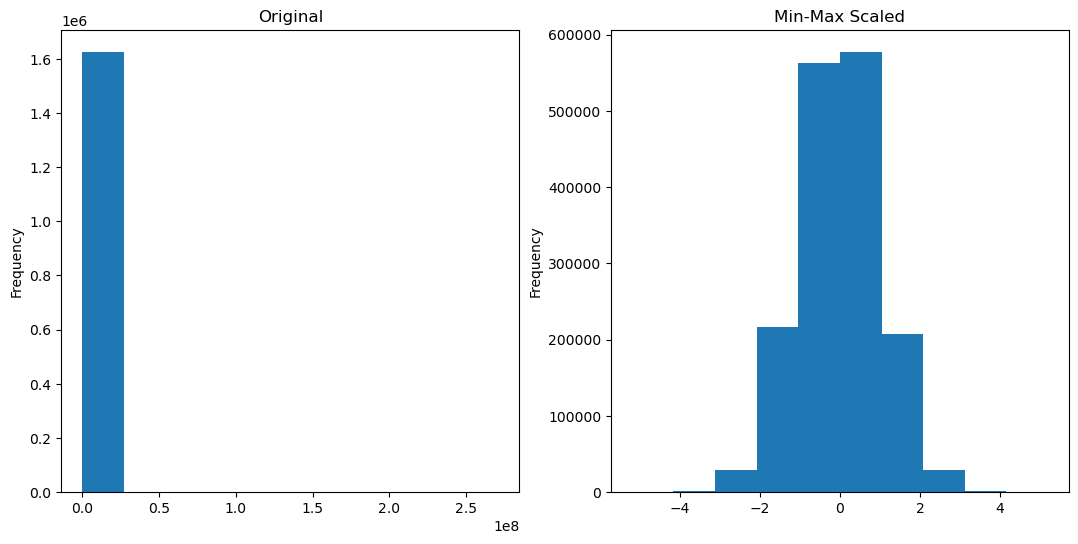

In [14]:
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.Tax_value_dollars.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.Tax_value_dollars_Scaled.plot.hist(title='Min-Max Scaled');

<h2>Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?<h2/>


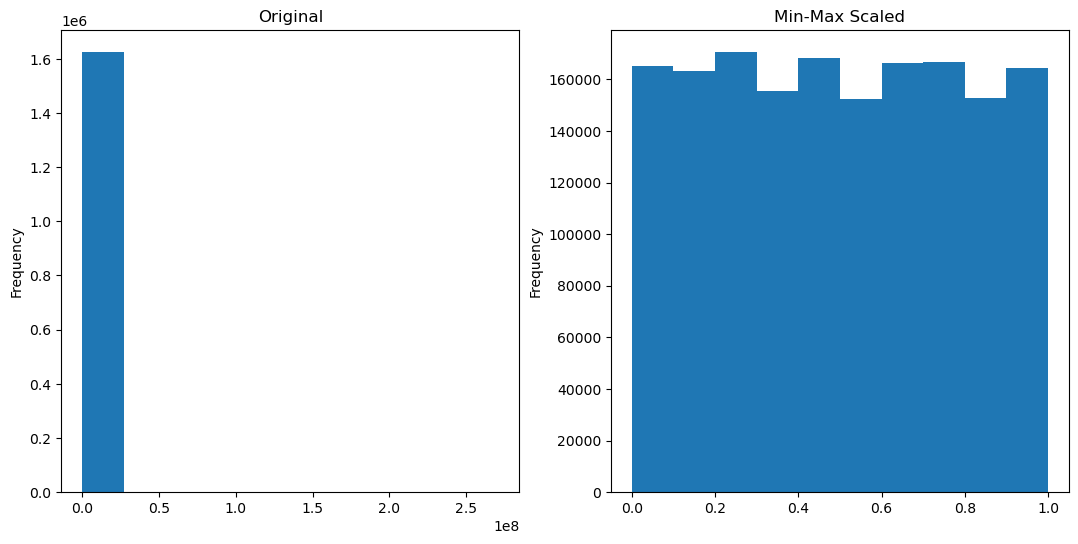

In [15]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)

from sklearn.preprocessing import QuantileTransformer
#Create the object
scaler = sklearn.preprocessing.QuantileTransformer()

#Fit the object
scaler.fit(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Use the object
scaled_columns = scaler.transform(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])

#Add the newly scaled columns (with the 'Scaled' names) to train
train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaled_columns

#Visualize the QuantileTransformer without 'output distribution' argument
plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.Tax_value_dollars.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.Tax_value_dollars_Scaled.plot.hist(title='Min-Max Scaled');

<h2>Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!<h2/>


In [16]:
def scale_data(train, validate, test):

    import sklearn
    from sklearn.preprocessing import MinMaxScaler
    
    #Create the object
    scaler = sklearn.preprocessing.MinMaxScaler()
    
    #Fit the object
    scaler.fit(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    #Use the object
    scaled_columns = scaler.transform(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    #Add the newly scaled columns (with the 'Scaled' names) to train
    train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaled_columns
    
    #Make new scaled columns with the newly scaled columns (with the 'Scaled' names) to validate and test

    validate[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaler.transform(validate[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    test[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled','Year_built_Scaled']] = scaler.transform(test[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    return train, validate, test
    
    
#----------------------------------------------------------------------------------------------------------------------------------   
    
def Qscale_data(train, validate, test):  
    
    import sklearn
    from sklearn.preprocessing import QuantileTransformer
    
    #Create the object
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    
    #Fit the object
    scaler.fit(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    #Use the object
    scaled_columns = scaler.transform(train[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    #Add the newly scaled columns (with the 'Scaled' names) to train
    train[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaled_columns

    #Make new scaled columns with the newly scaled columns (with the 'Scaled' names) to validate and test

    validate[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled', 'Year_built_Scaled']] = scaler.transform(validate[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    test[['Bedroom_Count_Scaled', 'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_value_dollars_Scaled', 'Tax_amount_Scaled','Year_built_Scaled']] = scaler.transform(test[['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount', 'Year_built']])
    
    return train, validate, test

In [17]:
#Let's test out our MinMaxScaler function

from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)

from wrangle import scale_data
scale_data(train, validate, test)

train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_value_dollars_Scaled,Tax_amount_Scaled,Year_built_Scaled
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0,0.12,0.06250,0.001456,0.001284,0.001242,0.714953
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0,0.20,0.09375,0.002545,0.002603,0.002483,0.808411
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0,0.04,0.03125,0.001154,0.001438,0.001553,0.948598
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0,0.08,0.06250,0.001274,0.001358,0.001371,0.934579
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0,0.16,0.06250,0.001789,0.001231,0.001442,0.691589


In [18]:
#Let's test out our QuantileTransformer Scaler function

from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)

from wrangle import Qscale_data
Qscale_data(train, validate, test)

train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_value_dollars_Scaled,Tax_amount_Scaled,Year_built_Scaled
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0,-0.096753,-0.225202,-0.325577,0.103984,-0.007390,-0.338834
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0,1.571286,0.844485,0.918047,1.086587,1.024324,0.432104
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0,-1.865852,-1.286702,-0.936623,0.275881,0.330279,1.750222
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0,-1.029375,-0.225202,-0.678642,0.183289,0.141354,1.525529
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0,0.797044,-0.225202,0.189000,0.038060,0.218174,-0.673702
